# Business Context

#### To develop a model for predicting fraudulent transactions for a
#### financial company and use insights from the model to develop an actionable plan.

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv('Fraud.csv')
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## DATASET ANALYSIS

In [3]:
fraud.isnull().values.any()

False

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This is a really big dataset with no NULL values present.

In [5]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.

In [6]:
fraud_df = fraud

In [7]:
legit = len(fraud_df[fraud_df.isFraud == 0])
fraud = len(fraud_df[fraud_df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. 

## DATA VISUALISATION

In [8]:
corr = fraud_df.corr()

<AxesSubplot:>

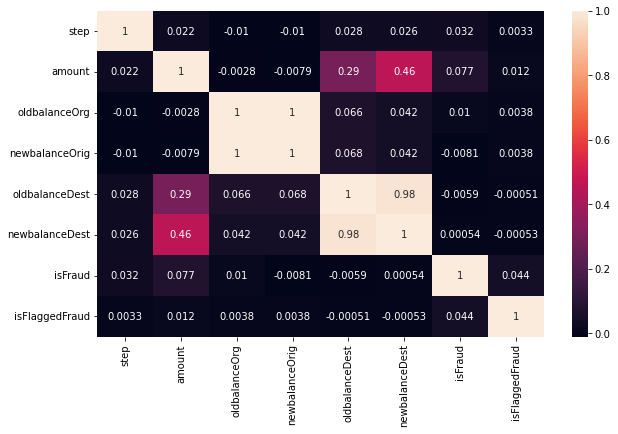

In [9]:
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True)

There is high correlation between newbalanceorg and oldbalanceorg, newbalancedest and oldbalancedest

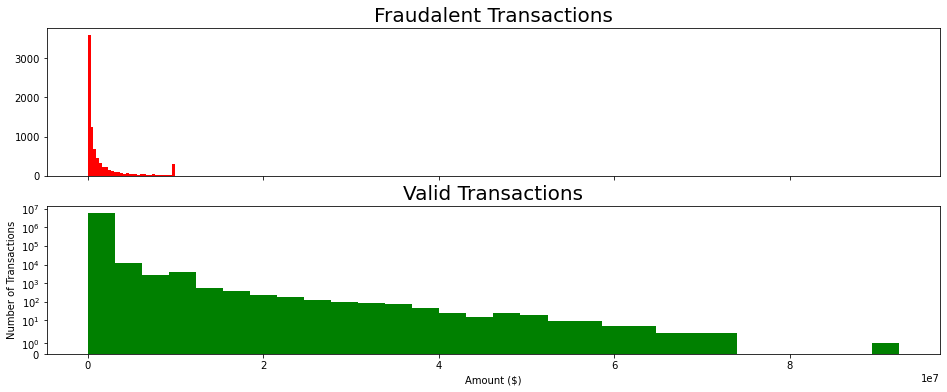

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.hist(fraud_df.amount[fraud_df.isFraud == 1], bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(fraud_df.amount[fraud_df.isFraud == 0], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)
plt.yscale('symlog')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.yscale('log')
plt.show()

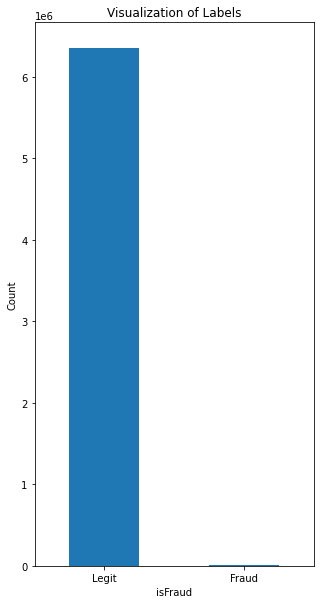

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = fraud_df.value_counts(fraud_df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [12]:
# creating a copy of original dataset

new_fraud_df=fraud_df.copy()
new_fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
objList = new_fraud_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


### LabelEncoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_fraud_df[feat] = le.fit_transform(new_fraud_df[feat].astype(str))

print (new_fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


## Treating Multicollinearity

In [15]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(fraud_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = fraud_df.columns
    vif["VIF"] = [variance_inflation_factor(fraud_df.values, i) for i in range(fraud_df.shape[1])]

    return(vif)

calc_vif(new_fraud_df)

,variables,VIF
0,step,NaN
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [16]:
new_fraud_df['Actual_amount_orig'] = new_fraud_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_fraud_df['Actual_amount_dest'] = new_fraud_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_fraud_df['TransactionPath'] = new_fraud_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_fraud_df = new_fraud_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_fraud_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

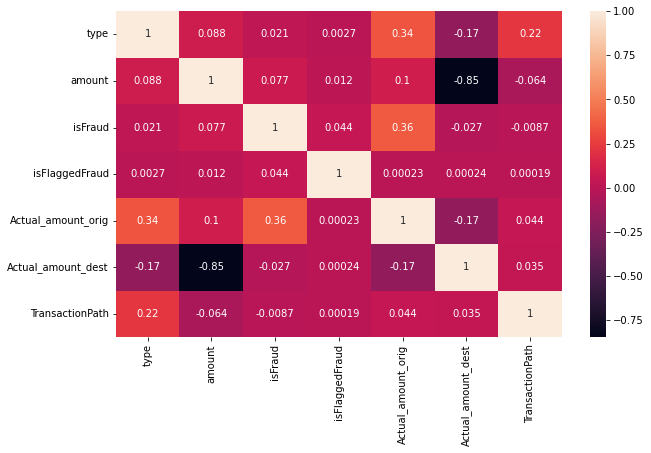

In [17]:
corr=new_fraud_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

How did you select variables to be included in the model?


Using the VIF(Variance inflation factor) values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

# MODEL BUILDING (without SMOTE(unbalanced Dataset))

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### NORMALIZING (SCALING) AMOUNT

In [19]:
# Perform Scaling
scaler = StandardScaler()
new_fraud_df["NormalizedAmount"] = scaler.fit_transform(new_fraud_df["amount"].values.reshape(-1, 1))
new_fraud_df.drop(["amount"], inplace= True, axis= 1)

Y = new_fraud_df["isFraud"]
X = new_fraud_df.drop(["isFraud"], axis= 1)

### TRAIN-TEST SPLIT

In [20]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### MODEL TRAINING

In [21]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [22]:
logisticRegr = LogisticRegression()
logit_model = logisticRegr.fit(X_train, Y_train)
logit_predict = logisticRegr.predict(X_test)
logistic_regression_score = logit_model.score(X_test, Y_test) * 100

### EVALUATION

In [23]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Logistic Regression Score: ", logistic_regression_score)

Decision Tree Score:  99.9239830971099
Logistic Regression Score:  99.8032781045125


In [24]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - LR

print("TP,FP,TN,FN - Logistic Regression")
tn, fp, fn, tp = confusion_matrix(Y_test, logit_predict).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1714
False Positives: 730
True Negatives: 1905621
False Negatives: 721
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Logistic Regression
True Positives: 921
False Positives: 2241
True Negatives: 1904110
False Negatives: 1514


In [25]:
print("classification report for decision tree")
print(classification_report(Y_test, Y_pred_dt))

print("------------------------------------------------------------------------------")

print("classification report for logistic regression")
print(classification_report(Y_test, logit_predict))

classification report for decision tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

------------------------------------------------------------------------------
classification report for logistic regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.29      0.38      0.33      2435

    accuracy                           1.00   1908786
   macro avg       0.65      0.69      0.66   1908786
weighted avg       1.00      1.00      1.00   1908786



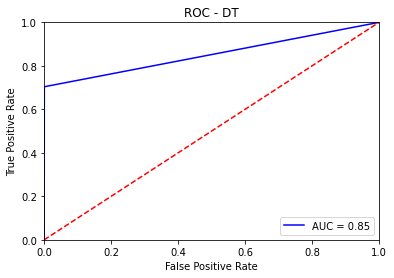

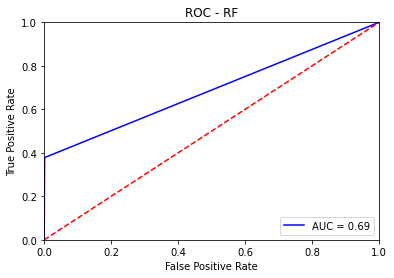

In [26]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, logit_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# MODEL BUILDING (with SMOTE(balanced Dataset))

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [35]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [37]:
#Logistic Regression

logisticRegr = LogisticRegression()
logit_model = logisticRegr.fit(X_train, Y_train)
logit_predict = logisticRegr.predict(X_test)
logistic_regression_score = logit_model.score(X_test, Y_test) * 100

In [38]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Logistic Regression Score: ", logistic_regression_score)

Decision Tree Score:  99.9226209747976
Logistic Regression Score:  99.8032781045125


In [39]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - LR

print("TP,FP,TN,FN - Logistic Regression")
tn, fp, fn, tp = confusion_matrix(Y_test, logit_predict).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1719
False Positives: 761
True Negatives: 1905590
False Negatives: 716
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Logistic Regression
True Positives: 921
False Positives: 2241
True Negatives: 1904110
False Negatives: 1514


In [40]:
print("classification report for decision tree")
print(classification_report(Y_test, Y_pred_dt))

print("------------------------------------------------------------------------------")

print("classification report for logistic regression")
print(classification_report(Y_test, logit_predict))

classification report for decision tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

------------------------------------------------------------------------------
classification report for logistic regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.29      0.38      0.33      2435

    accuracy                           1.00   1908786
   macro avg       0.65      0.69      0.66   1908786
weighted avg       1.00      1.00      1.00   1908786



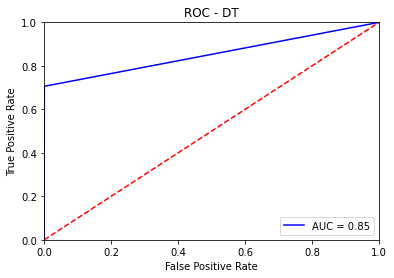

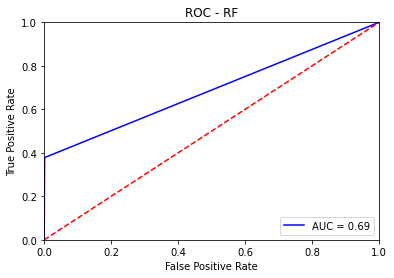

In [41]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, logit_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## After analysing classification reports of before and after SMOTE 

######  -In the unbalanced dataset, the Recall and F1-Score is very low for models.

###### -In the balanced dataset, the Recall and F1-Score is very high for decision tree model

###### -Logistic regression is giving low recall and F1-Score regardless of the dataset balanced or unbalanced.

# Conclusions:

Good prediction results can be achieved with imbalanced datasets as well as with balanced ones. Decision Tree Classifier gave us the best result being able to detect more than 99.92% fraud transactions and at the same time not classifying some of non-fraud transactions as fraud. Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off There is no perfect model and there will always be a trade-off between precision and recall.




What are the key factors that predict fraudulent customer? 
1. Identity of the customers.
2. customers past order details.
3. Transaction details of the customers.
4. methods preferred for the payment.


Do these factors make sense? If yes, How? If not, How not?
While these factors cannot be considered as exhaustive, these are essential factors for an effective outcome in AI-driven fraud prediction efforts. A responsible model building can bring more holistic impact through solutions that we build for fraud prediction using Machine learning.


What kind of prevention should be adopted while company update its infrastructure?
1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.


Assuming these actions have been implemented, how would you determine if they work?
1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
3. Always keep a log of your payments.
